In [209]:
import pandas as pd
import numpy  as np

df = pd.read_csv('googleplaystore.csv')
df.shape

(10841, 13)

In [210]:
# check the fraction of missing values per column
print(df.isnull().sum(axis=0)/df.shape[0])
print(sum(df.isnull().sum(axis=1)!=0)/df.shape[0])

App               0.000000
Category          0.000000
Rating            0.135965
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000092
Price             0.000000
Content Rating    0.000092
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000738
Android Ver       0.000277
dtype: float64
0.13661101374411955


In [211]:
# fill in Types since it can be implied from Price
a = df.Type.isna()
for i in range(len(df.Type)):
    if a[i] == True:
        if df.Price[i] == "0":
            df.Type[i] = "Free"
        else:
            df.Type[i] = "Paid"

df.Type.isna().any()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False

In [212]:
# treat missing values in Content Rating
df["Content Rating"].replace(to_replace=np.nan,value = "missing", inplace=True)
df["Content Rating"].isna().any()

False

In [213]:
# reserve missing datapoints in Rating as test set
df_test = df.iloc[list(np.where(np.isnan(df.Rating))[0])]

In [214]:
# drop missing values
df.dropna(inplace = True)   #remove missing entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null object
Installs          9360 non-null object
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [215]:
print(df.Category.unique())
print(df.Category.unique().shape)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
(33,)


In [216]:
# convert the type of Reviews from object to int
df['Reviews'] = df['Reviews'].astype(int)
df.Reviews.dtypes

dtype('int64')

In [217]:
df.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [218]:
df['Size varies'] = df.Size.apply(lambda x: 1 if 'Varies' in x else 0)

In [219]:
df.Size = df.Size.replace('Varies with device','0')

In [220]:
#convert Size into a uniform standard of numeric
df.Size = df.Size.str.replace('k','e+3')
df.Size = df.Size.str.replace('M','e+6')

In [221]:
df.Size = pd.to_numeric(df.Size)

In [222]:
df.Size = df.Size/1000000

In [223]:
df.Size

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10834     2.6
10836    53.0
10837     3.6
10839     0.0
10840    19.0
Name: Size, Length: 9360, dtype: float64

In [224]:
# seen as a categorical feature and find the unique values
a = df.Installs.unique()
a

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [225]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [226]:
# remove the "$" and convert to numeric
df.Price = df.Price.apply(lambda x: x.strip('$'))
df.Price = pd.to_numeric(df.Price)
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [227]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [228]:
df.Genres

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
3                     Art & Design
4          Art & Design;Creativity
                   ...            
10834                    Education
10836                    Education
10837                    Education
10839            Books & Reference
10840                    Lifestyle
Name: Genres, Length: 9360, dtype: object

In [229]:
# split the genres
split_genres1 = df.Genres.apply(lambda x: x.split(';')[0])
split_genres2 = df.Genres.apply(lambda x: x.split(';')[-1])
df["First Genre"]=split_genres1
df["Second Genre"]=split_genres2

In [230]:
df["Last Updated"]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10834       June 18, 2017
10836       July 25, 2017
10837        July 6, 2018
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 9360, dtype: object

In [231]:
# convert it to the date using datetime package
from datetime import datetime,date
update_date=pd.to_datetime(df["Last Updated"])
update_date.head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

In [232]:
# convert to the days till now to get more inspirations
df["Updated Days"] = update_date.apply(lambda x:date.today()-datetime.date(x))
df["Updated Days"]

0        652 days
1        644 days
2        446 days
3        500 days
4        488 days
           ...   
10834    855 days
10836    818 days
10837    472 days
10839   1736 days
10840    453 days
Name: Updated Days, Length: 9360, dtype: timedelta64[ns]

In [233]:
# convert to numeric
df["Updated Days"] = df["Updated Days"].astype(int)
df["Updated Days"] = df["Updated Days"] / 864e+11
df["Updated Days"]

0         652.0
1         644.0
2         446.0
3         500.0
4         488.0
          ...  
10834     855.0
10836     818.0
10837     472.0
10839    1736.0
10840     453.0
Name: Updated Days, Length: 9360, dtype: float64

In [234]:
df["Current Ver"]

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10834                 1.0.0
10836                  1.48
10837                   1.0
10839    Varies with device
10840    Varies with device
Name: Current Ver, Length: 9360, dtype: object

In [235]:
# change into the format of number.number
import re
df["Current Ver"]=df["Current Ver"].apply(lambda x: 'Varies with device' if x=='Varies with device'  else  re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0])

In [236]:
df["Current Ver"].unique()

array(['1.0', '2.0', '1.2', 'Varies with device', '1.1', '6.1', '2.9',
       '2.8', '3.8', '3.1', '2.2', '5.5', '4.0', '1.5', '6.0', '6.7',
       '1.6', '2.1', '1.3', '1', '1.4', '3.0', '1.7', '2.5', '2.4', '1.9',
       '0.2', '4.4', '2.3', '8.3', '3.2', '4.6', '5.4', '3.3', '9.1',
       '5.0', '9.0', '7.0', '3.9', '3.4', '9.7', '4.9', '5.2', '3.5',
       '7.3', '5.1', '4.1', '9', '0.9', '6.4', '3.7', '2.6', '4.3', '6.3',
       '4.7', '4.2', '1.8', '3', '9.8', '2', '4', '', '6', '7.5', '9.9',
       '0.1', '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '8.1', '6.6',
       '4.8', '8.7', '0.0', '3.6', '5.3', '8.2', '5.7', '8.5', '0', '8.0',
       '8.4', '6.8', '6.2', '2.7', '5.9', '7.8', '7.1', '7.9', '8.8',
       '7.4', '9.6', '8', '9.4', '5', '0.7', '0.5', '7', '7.6', '0.6',
       '8.9', '6.9', '9.3', '9.2', '8.6', '9.5', '0.8', '0.4', '0.3'],
      dtype=object)

In [237]:
df['Current ver varies'] = df['Current Ver'].apply(lambda x: 1 if 'Varies' in x else 0)

In [238]:
# deal with "Varies" and empty values
df["Current Ver"].replace(to_replace="Varies with device",value = "0", inplace=True)
df["Current Ver"].replace(to_replace="",value = "0", inplace=True)
df["Current Ver"].unique()

array(['1.0', '2.0', '1.2', '0', '1.1', '6.1', '2.9', '2.8', '3.8', '3.1',
       '2.2', '5.5', '4.0', '1.5', '6.0', '6.7', '1.6', '2.1', '1.3', '1',
       '1.4', '3.0', '1.7', '2.5', '2.4', '1.9', '0.2', '4.4', '2.3',
       '8.3', '3.2', '4.6', '5.4', '3.3', '9.1', '5.0', '9.0', '7.0',
       '3.9', '3.4', '9.7', '4.9', '5.2', '3.5', '7.3', '5.1', '4.1', '9',
       '0.9', '6.4', '3.7', '2.6', '4.3', '6.3', '4.7', '4.2', '1.8', '3',
       '9.8', '2', '4', '6', '7.5', '9.9', '0.1', '7.7', '7.2', '6.5',
       '5.6', '4.5', '5.8', '8.1', '6.6', '4.8', '8.7', '0.0', '3.6',
       '5.3', '8.2', '5.7', '8.5', '8.0', '8.4', '6.8', '6.2', '2.7',
       '5.9', '7.8', '7.1', '7.9', '8.8', '7.4', '9.6', '8', '9.4', '5',
       '0.7', '0.5', '7', '7.6', '0.6', '8.9', '6.9', '9.3', '9.2', '8.6',
       '9.5', '0.8', '0.4', '0.3'], dtype=object)

In [239]:
# seen as categorical and order it
df["Current Ver"] = pd.to_numeric(df["Current Ver"])
uniq_ver = df["Current Ver"].unique()
ord_ver = sorted(uniq_ver)

In [240]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [241]:
df['Android ver varies'] = df['Android Ver'].apply(lambda x: 1 if 'Varies' in x else 0)

In [242]:
# split
df["Min Ver"]=df["Android Ver"].apply(lambda x:str(x).split(' and ')[0].split(' - ')[0])
df["Min Ver"]=df["Min Ver"].replace('4.4W','4.4')
df["Max Ver"]=df["Android Ver"].apply(lambda x:str(x).split(' and ')[-1].split(' - ')[-1])

In [243]:
df["Min Ver"].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '4.3', '2.0', '3.2', '5.1', '7.1', '8.0', '3.1', '2.0.1',
       '1.0'], dtype=object)

In [244]:
df["Max Ver"].unique()

array(['up', 'Varies with device', '7.1.1', '8.0', '6.0'], dtype=object)

In [245]:
df["Min Ver"].replace(to_replace="Varies with device",value = "0", inplace=True)
df["Max Ver"].replace(to_replace="Varies with device",value = "0", inplace=True)

df["Min Ver"]=df["Min Ver"].apply(lambda x: 'Varies with device' if x=='Varies with device'  else  re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x))[0])
df["Max Ver"]=df["Max Ver"].apply(lambda x: 'Varies with device' if x=='Varies with device'  else  ('9.0' if 'up' in x else re.findall('^[0-9]\.[0-9]|[\d]|\W*',str(x)))[0])

In [246]:
a1 = df["Min Ver"].unique()
a1

array(['4.0', '4.2', '4.4', '2.3', '3.0', '4.1', '0', '2.2', '5.0', '6.0',
       '1.6', '1.5', '2.1', '7.0', '4.3', '2.0', '3.2', '5.1', '7.1',
       '8.0', '3.1', '1.0'], dtype=object)

In [247]:
ord_min = sorted(a1)

In [248]:
df["Max Ver"].unique()

array(['9', '0', '7.1', '8.0', '6.0'], dtype=object)

In [249]:
a2 = df["Max Ver"].unique()
ord_max = sorted(a2)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 21 columns):
App                   9360 non-null object
Category              9360 non-null object
Rating                9360 non-null float64
Reviews               9360 non-null int64
Size                  9360 non-null float64
Installs              9360 non-null object
Type                  9360 non-null object
Price                 9360 non-null float64
Content Rating        9360 non-null object
Genres                9360 non-null object
Last Updated          9360 non-null object
Current Ver           9360 non-null float64
Android Ver           9360 non-null object
Size varies           9360 non-null int64
First Genre           9360 non-null object
Second Genre          9360 non-null object
Updated Days          9360 non-null float64
Current ver varies    9360 non-null int64
Android ver varies    9360 non-null int64
Min Ver               9360 non-null object
Max Ver               9360 non-

In [251]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [252]:
#df.drop(columns=['App'],inplace=True)
print(df.shape)
cat_ftrs = ['Category','First Genre','Second Genre']
ordinal_ftrs = ['Size varies','Installs','Type','Content Rating','Current Ver','Current ver varies','Min Ver','Max Ver','Android ver varies']
ordinal_cats = [[0,1],\
                ['1+','5+','10+','50+','100+','500+','1,000+','5,000+','10,000+','50,000+','100,000+','500,000+',\
                 '1,000,000+','5,000,000+','10,000,000+','50,000,000+','100,000,000+','500,000,000+','1,000,000,000+'],\
                ['Free','Paid'],\
                ['Teen','Everyone 10+','Mature 17+','Adults only 18+','Everyone','Unrated'],\
                ord_ver,[0,1],ord_min,ord_max,[0,1]]
minmax_ftrs = ['Price']
standard_ftrs = ['Reviews','Size','Updated Days']

(9360, 21)


In [253]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size varies', 'First Genre', 'Second Genre',
       'Updated Days', 'Current ver varies', 'Android ver varies', 'Min Ver',
       'Max Ver'],
      dtype='object')

In [254]:
# one-hot encoder
ohe = OneHotEncoder(sparse=False)
si = SimpleImputer(strategy='constant',fill_value='missing')
cat_values = ohe.fit_transform(si.fit_transform(df[cat_ftrs]))
cat_ftr_names = ohe.get_feature_names()
df_cat = pd.DataFrame(data=cat_values,columns = cat_ftr_names)

In [255]:
# ordinal encoder
oe = OrdinalEncoder(categories = ordinal_cats)
si2 = SimpleImputer(strategy='constant',fill_value='NA')
oe_values = oe.fit_transform(si2.fit_transform(df[ordinal_ftrs]))
df_ordinal = pd.DataFrame(data=oe_values,columns = ordinal_ftrs)

In [256]:
# standard scaler
ss = StandardScaler()
num_values = ss.fit_transform(df[standard_ftrs])
df_standard = pd.DataFrame(data=num_values,columns = standard_ftrs)

In [257]:
# minmax scaler
mms = MinMaxScaler()
minmax_values = ss.fit_transform(df[minmax_ftrs])
df_minmax = pd.DataFrame(data=minmax_values,columns = minmax_ftrs)

In [258]:
df_preprocessed = pd.concat([df_cat,df_ordinal,df_standard,df_minmax],axis=1)
df_preprocessed['Rating'] = df['Rating']
df_preprocessed.shape

(9360, 147)

In [259]:
df_preprocessed.head()

,x0_ART_AND_DESIGN,x0_AUTO_AND_VEHICLES,x0_BEAUTY,x0_BOOKS_AND_REFERENCE,x0_BUSINESS,x0_COMICS,x0_COMMUNICATION,x0_DATING,x0_EDUCATION,x0_ENTERTAINMENT,...,Current Ver,Current ver varies,Min Ver,Max Ver,Android ver varies,Reviews,Size,Updated Days,Price,Rating
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,11.0,4.0,0.0,-0.163511,0.002038,-0.097080,-0.06076,4.1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,11.0,4.0,0.0,-0.163254,-0.215189,-0.117274,-0.06076,3.9
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,0.0,11.0,4.0,0.0,-0.135735,-0.445451,-0.617090,-0.06076,4.7
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,13.0,4.0,0.0,-0.094991,0.262712,-0.480776,-0.06076,4.5
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,0.0,15.0,4.0,0.0,-0.163254,-0.701779,-0.511068,-0.06076,4.3


In [260]:
y = df.Rating
print(y.describe())

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


In [261]:
import matplotlib
from matplotlib import pylab as plt

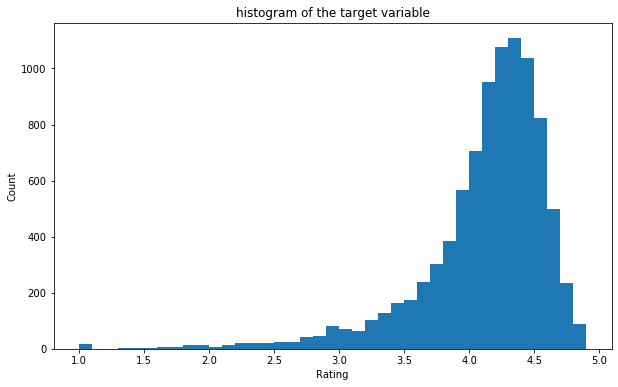

In [262]:
plt.figure(figsize=(10,6))
plt.hist(y,bins = np.arange(1, 5, step=0.1))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('histogram of the target variable')
plt.savefig('fig/hist.png',dpi=300)
plt.show()

The ratings of the apps in the app store seems to follow a left skewed distribution. Most of the apps are rated between 4.0 and 4.7. They do a good job with an average rating of 4.19.

In [263]:
df.Category.value_counts()

FAMILY                 1746
GAME                   1097
TOOLS                   733
PRODUCTIVITY            351
MEDICAL                 350
COMMUNICATION           328
FINANCE                 323
SPORTS                  319
PHOTOGRAPHY             317
LIFESTYLE               314
PERSONALIZATION         312
BUSINESS                303
HEALTH_AND_FITNESS      297
SOCIAL                  259
SHOPPING                238
NEWS_AND_MAGAZINES      233
TRAVEL_AND_LOCAL        226
DATING                  195
BOOKS_AND_REFERENCE     178
VIDEO_PLAYERS           160
EDUCATION               155
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     124
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
WEATHER                  75
AUTO_AND_VEHICLES        73
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [264]:
df_cat1 = df.groupby('Category').filter(lambda x: len(x) >= 200)
df_cat2 = df.groupby('Category').filter(lambda x: len(x) < 200)

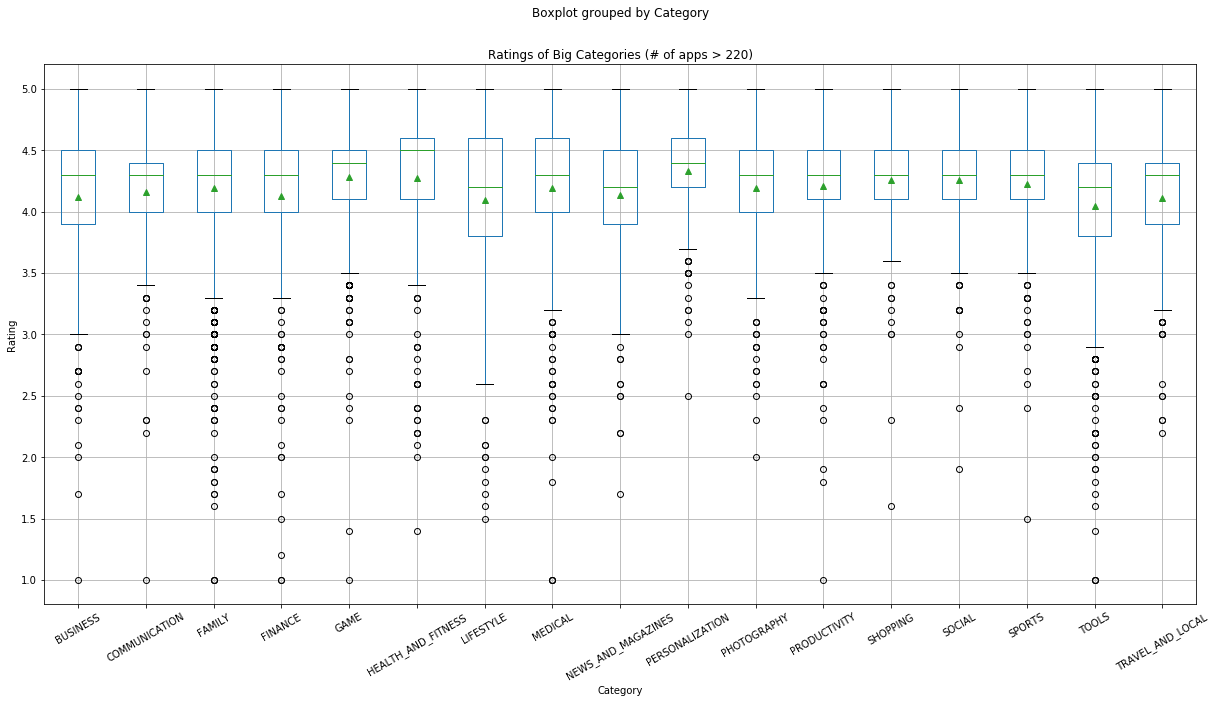

In [265]:
df_cat1[['Rating','Category']].boxplot(by='Category',figsize = (20,10),showmeans=True)
#plt.tight_layout()
plt.xticks(rotation=30)
#plt.yticks(np.arange(2.5, 5, step=0.1))
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Ratings of Big Categories (# of apps > 220)')
plt.savefig('fig/box_cat_rating1.png',dpi=300)
plt.show()

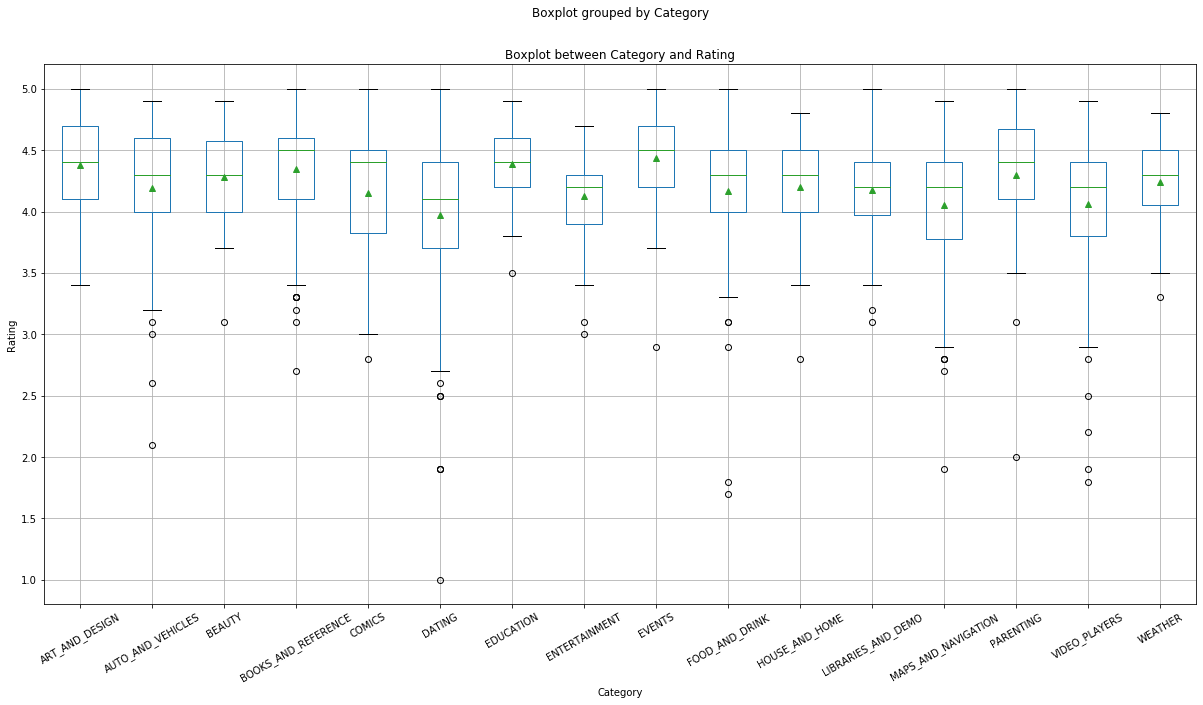

In [266]:
df_cat2[['Rating','Category']].boxplot(by='Category',figsize = (20,10),showmeans=True)
#plt.tight_layout()
plt.xticks(rotation=30)
#plt.yticks(np.arange(2.5, 5, step=0.1))
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Boxplot between Category and Rating')
plt.savefig('fig/box_cat_rating2.png',dpi=300)
plt.show()

We take a close look at the categories that have more than 200 apps, which is the median number of apps group by categories.   

We can see that some categories, such as health and fitness, books and reference, events have more than 50% of apps rated higher than 4.5, which is higer than the average rating of overall apps which is about 4.2. Also, some categories, such as beauty, education and weather do a good job for they do not have ratings below 3. However, there are categories that both have very good and bad ratings, such as family and finace, which implies the users are more selective in these categories.

In [267]:
#a = df['Rating'].hist(by=df['Category'], sharex=True, figsize=(20,20))

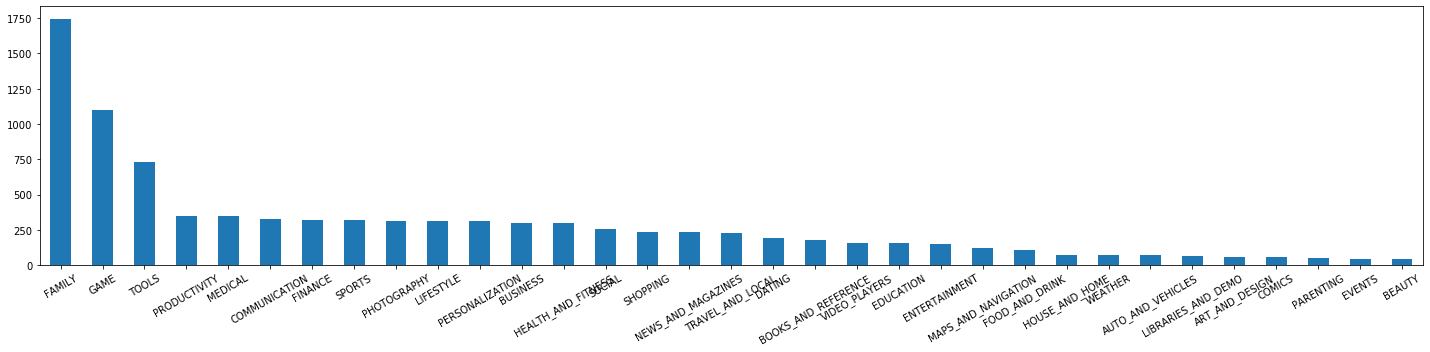

In [268]:
plt.figure(figsize=(20,5))
pd.value_counts(df['Category']).plot.bar()
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [269]:
df.Size.describe()

count    9360.000000
mean       18.953080
std        23.018546
min         0.000000
25%         2.400000
50%         9.500000
75%        27.000000
max       100.000000
Name: Size, dtype: float64

In [270]:
df[df.Size > 40]['Category'].value_counts()

GAME                   502
FAMILY                 492
SPORTS                  51
HEALTH_AND_FITNESS      50
MEDICAL                 37
PHOTOGRAPHY             33
TRAVEL_AND_LOCAL        32
FINANCE                 29
SOCIAL                  25
LIFESTYLE               20
PRODUCTIVITY            18
BUSINESS                17
EDUCATION               17
PERSONALIZATION         15
DATING                  14
FOOD_AND_DRINK          14
VIDEO_PLAYERS           13
ENTERTAINMENT           13
MAPS_AND_NAVIGATION     12
SHOPPING                11
TOOLS                   11
BOOKS_AND_REFERENCE     11
COMMUNICATION            8
AUTO_AND_VEHICLES        8
PARENTING                7
LIBRARIES_AND_DEMO       5
HOUSE_AND_HOME           3
BEAUTY                   3
WEATHER                  2
NEWS_AND_MAGAZINES       2
EVENTS                   2
Name: Category, dtype: int64

In [271]:
#df_size = df[df.Size > 40]

In [272]:
#plt.figure(figsize=(20,5))
#pd.value_counts(df_size['Category']).plot.bar()
#plt.xticks(rotation=30)
#plt.tight_layout()
#plt.show()

In [273]:
#df_size_cat = df[(df.Size > 40) & ((df.Category == 'GAME') | (df.Category == 'FAMILY'))]

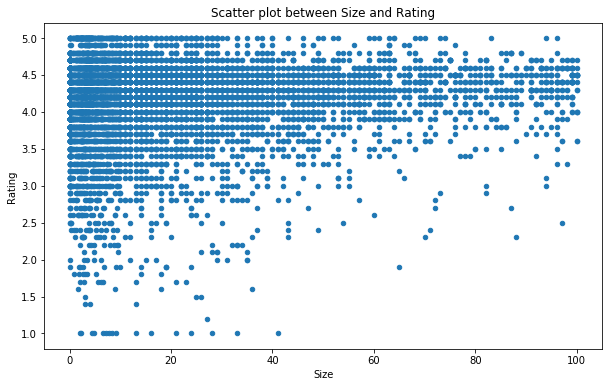

In [274]:
df.plot.scatter('Size','Rating',figsize = (10,6))
plt.title('Scatter plot between Size and Rating')
plt.savefig('fig/scat_size_rating.png',dpi=300)
plt.show()

We also look at apps with large size like over 60 megabytes and find out that they totally have high ratings on average.

In [275]:
df['Category'][df.Price > 200].value_counts()

FINANCE      6
LIFESTYLE    5
FAMILY       4
Name: Category, dtype: int64

In [276]:
df.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

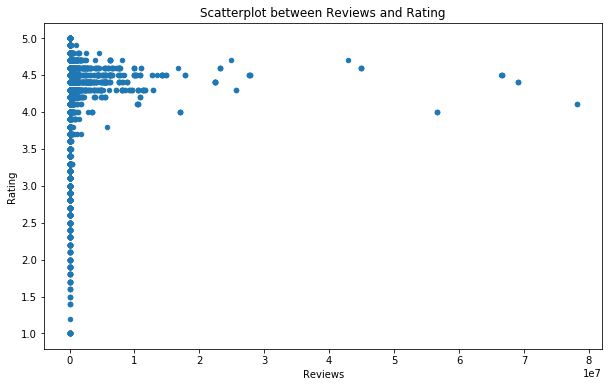

In [277]:
df.plot.scatter('Reviews','Rating',figsize = (10,6))
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Scatterplot between Reviews and Rating')
plt.savefig('fig/scat_rev_rating.png',dpi=300)
plt.show()

In [294]:
df_review = df[(df.Reviews) > 20000000]
df_review.App.value_counts()

Candy Crush Saga                                      7
Subway Surfers                                        6
Instagram                                             4
Clash Royale                                          4
Clash of Clans                                        4
Messenger – Text and Video Chat for Free              3
WhatsApp Messenger                                    3
YouTube                                               2
Facebook                                              2
Clean Master- Space Cleaner & Antivirus               1
Security Master - Antivirus, VPN, AppLock, Booster    1
Name: App, dtype: int64

In [280]:
df_review.sort_values(by=['Reviews'],ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Current Ver,Android Ver,Size varies,First Genre,Second Genre,Updated Days,Current ver varies,Android ver varies,Min Ver,Max Ver
2544,Facebook,SOCIAL,4.1,78158306,0.0,"1,000,000,000+",Free,0.0,Teen,Social,...,0.0,Varies with device,1,Social,Social,444.0,1,1,0,0
3943,Facebook,SOCIAL,4.1,78128208,0.0,"1,000,000,000+",Free,0.0,Teen,Social,...,0.0,Varies with device,1,Social,Social,444.0,1,1,0,0
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,"1,000,000,000+",Free,0.0,Everyone,Communication,...,0.0,Varies with device,1,Communication,Communication,444.0,1,1,0,0
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,"1,000,000,000+",Free,0.0,Everyone,Communication,...,0.0,Varies with device,1,Communication,Communication,444.0,1,1,0,0
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,0.0,"1,000,000,000+",Free,0.0,Everyone,Communication,...,0.0,Varies with device,1,Communication,Communication,444.0,1,1,0,0
2604,Instagram,SOCIAL,4.5,66577446,0.0,"1,000,000,000+",Free,0.0,Teen,Social,...,0.0,Varies with device,1,Social,Social,447.0,1,1,0,0
2611,Instagram,SOCIAL,4.5,66577313,0.0,"1,000,000,000+",Free,0.0,Teen,Social,...,0.0,Varies with device,1,Social,Social,447.0,1,1,0,0
2545,Instagram,SOCIAL,4.5,66577313,0.0,"1,000,000,000+",Free,0.0,Teen,Social,...,0.0,Varies with device,1,Social,Social,447.0,1,1,0,0
3909,Instagram,SOCIAL,4.5,66509917,0.0,"1,000,000,000+",Free,0.0,Teen,Social,...,0.0,Varies with device,1,Social,Social,447.0,1,1,0,0
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,"1,000,000,000+",Free,0.0,Everyone,Communication,...,0.0,Varies with device,1,Communication,Communication,446.0,1,1,0,0


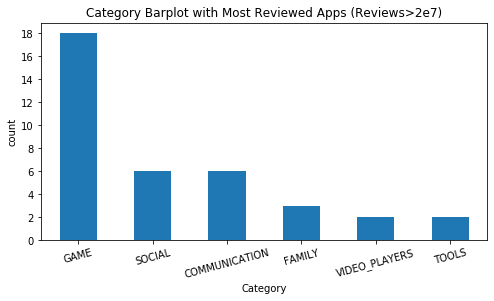

In [281]:
plt.figure(figsize=(8,4))
pd.value_counts(df_review['Category']).plot.bar()
plt.xticks(rotation=15)
plt.xlabel('Category')
plt.ylabel('count')
plt.yticks(np.arange(0, 20, step=2))
plt.title('Category Barplot with Most Reviewed Apps (Reviews>2e7)')
plt.savefig('fig/most_reviewed.png')
plt.show()

In [282]:
df_rev = df[(df.Reviews < 10000)]

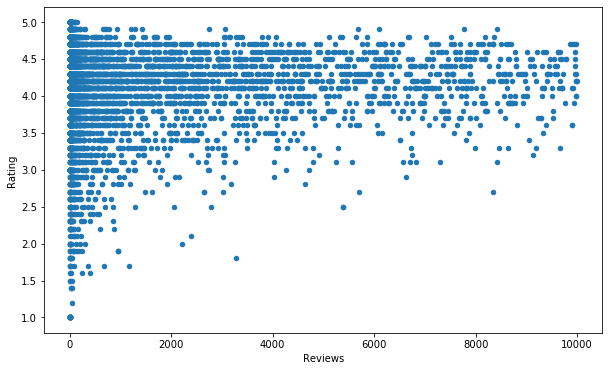

In [283]:
df_rev.plot.scatter('Reviews','Rating',figsize = (10,6))
plt.show()

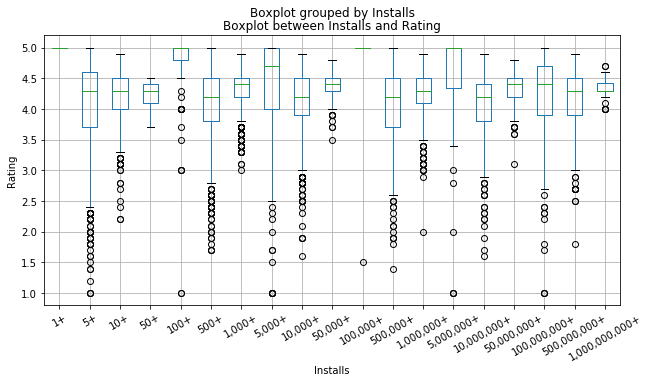

In [284]:
ax = df[['Rating','Installs']].boxplot(by='Installs',figsize = (10,5))
plt.xlabel('Installs')
plt.ylabel('Rating')
plt.title('Boxplot between Installs and Rating')
labels = ax.set_xticklabels(['1+','5+','10+','50+','100+','500+','1,000+','5,000+','10,000+','50,000+','100,000+','500,000+',\
                             '1,000,000+','5,000,000+','10,000,000+','50,000,000+','100,000,000+','500,000,000+','1,000,000,000+'],rotation=30)
plt.savefig('fig/box_ins_rating.png',dpi=300)
plt.show()

With this plot, we cannot easily say by intuition that more installs results in high ratings. And we can see that the median rating will be above 4 no matter how many times an app was installed.

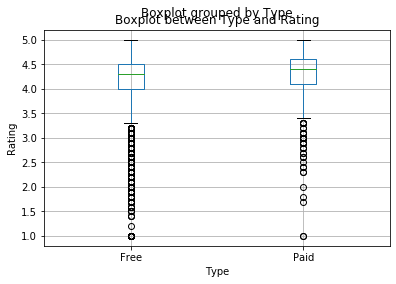

In [285]:
df[['Rating','Type']].boxplot(by='Type')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.title('Boxplot between Type and Rating')
plt.savefig('fig/box_type_rating.png',dpi=300)
plt.show()

On average, paid apps achieve higher ratings.

In [286]:
df_price = df.sort_values(by=['Price'],ascending=False)
df_price = df_price[:100]

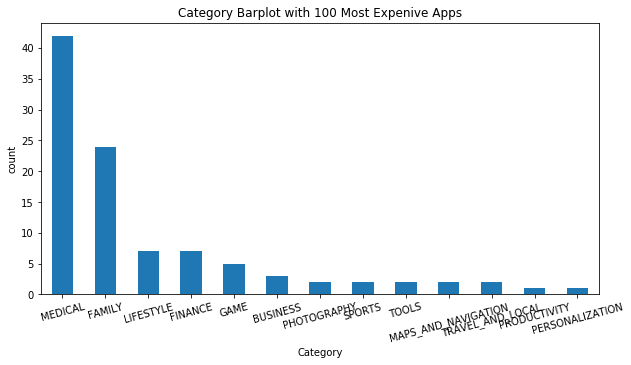

In [287]:
plt.figure(figsize=(10,5))
pd.value_counts(df_price['Category']).plot.bar()
plt.xticks(rotation=15)
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Category Barplot with 100 Most Expenive Apps')
plt.savefig('fig/100_expensive.png')
plt.show()

By the way, we take a look at the 100 most expenive apps and find that medical, family and finance are the three most expensive among all the categories.

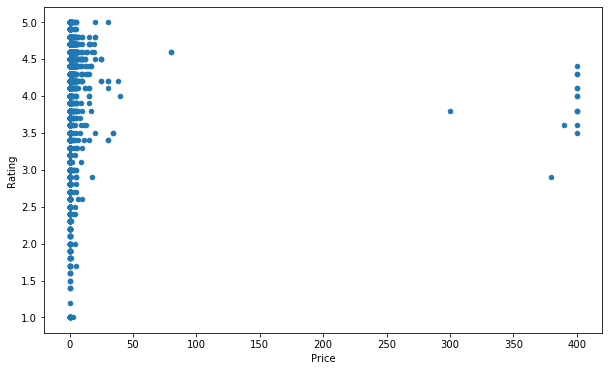

In [288]:
df.plot.scatter('Price','Rating',figsize = (10,6))
plt.show()

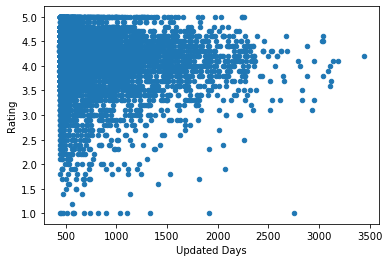

In [289]:
df.plot.scatter('Updated Days','Rating')

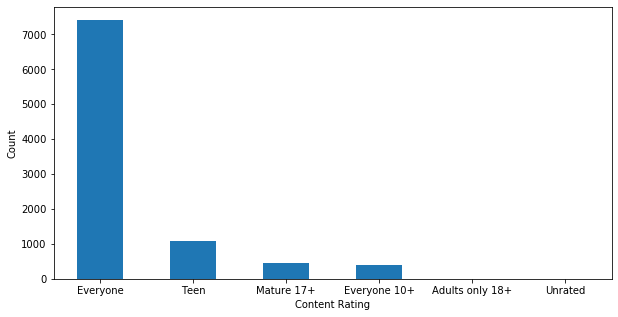

In [290]:
plt.figure(figsize=(10,5))
pd.value_counts(df['Content Rating']).plot.bar()
#plt.tight_layout()
plt.xticks(rotation=0)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()

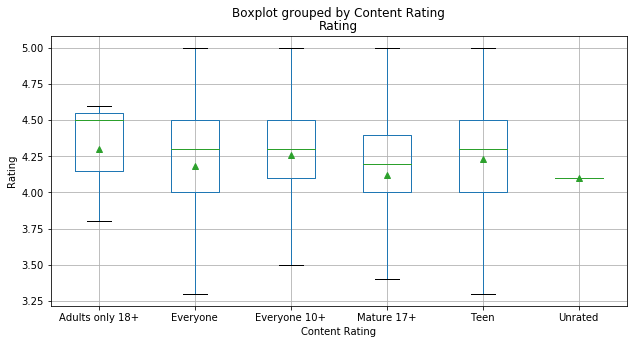

In [291]:
df[['Rating','Content Rating']].boxplot(by='Content Rating',showfliers = False,showmeans = True,figsize=(10,5))
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.show()

The majority of the content rating of apps target at everyone. However, when we look at the ratings in each target group, we can see that some groups have higher ratings on average.

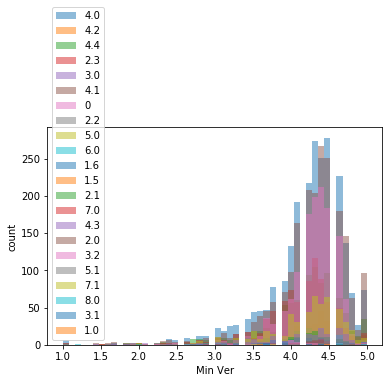

In [292]:
categories = df['Min Ver'].unique()
bin_range = (df['Rating'].min(),df['Rating'].max())

for c in categories:
    plt.hist(df[df['Min Ver']==c]['Rating'],alpha=0.5,label=c,range=bin_range,bins=50)
plt.legend()
plt.ylabel('count')
plt.xlabel('Min Ver')
plt.show()